In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft, ifft, fftfreq
import scipy

# 1.

In [128]:
def get_cos_singal(f=[50,150,450], fs=10000, A=2.0, a=-0.1, b=0.1, noise=None):
    t = np.linspace(a, b, fs)
    omegas = [2 * np.pi * f_curr for f_curr in f]
    x_cos = np.sum([A * np.cos(omega * t) for omega in omegas], axis=0)
    if noise:
        for i in range(len(x_cos)):
            x_cos[i] += (np.random.rand() * noise)
    return x_cos

# 2.

In [114]:
def butter_down_filter(freqs, cutoff):
    omega = 2 * np.pi * freqs / cutoff
    H = 1 / (-omega**2 + 1j * np.sqrt(2) * omega + 1)
    return H

In [115]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

In [116]:
signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H_down = butter_down_filter(frequencies, cutoff)
filtred_signal_fft = signal_fft * np.abs(H_down)
filtred_signal = ifft(filtred_signal_fft)

In [1]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t, x_cos)

plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

plt.subplot(2, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

SyntaxError: positional argument follows keyword argument (2628596227.py, line 2)

# 3.

In [39]:
x_cos_50_450 = get_cos_singal(f=[50, 450], fs=10000, A=2.0, a=-0.1, b=0.1)
signal_fft = fft(x_cos_50_450)
frequencies = fftfreq(len(x_cos_50_450), d=t[1] - t[0])
cutoff = 100
H_down = butter_down_filter(frequencies, cutoff)
filtred_signal_fft = signal_fft * np.abs(H_down)
filtred_signal = ifft(filtred_signal_fft)

c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 500.0)

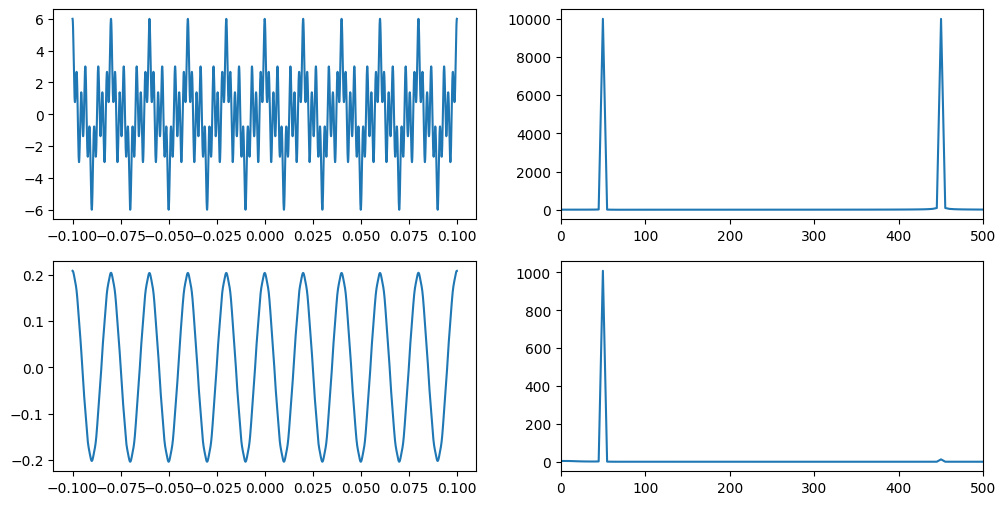

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t, x_cos)

plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

plt.subplot(2, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

# 4.

In [64]:
def butter_up_filter(freqs, cutoff):
    omega = np.where(freqs != 0, 2 * np.pi * cutoff / freqs, 50000)
    H = 1 / (omega**2 + 1j * np.sqrt(2) * omega + 1)
    return H

In [65]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

In [69]:
signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H_up = butter_up_filter(frequencies, cutoff)
filtred_signal_fft = signal_fft * np.abs(H_up)
filtred_signal = ifft(filtred_signal_fft)

C:\Users\ivan\AppData\Local\Temp\ipykernel_6268\3747560740.py:2: RuntimeWarning: divide by zero encountered in divide
  omega = np.where(freqs != 0, 2 * np.pi * cutoff / freqs, 50000)


c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 500.0)

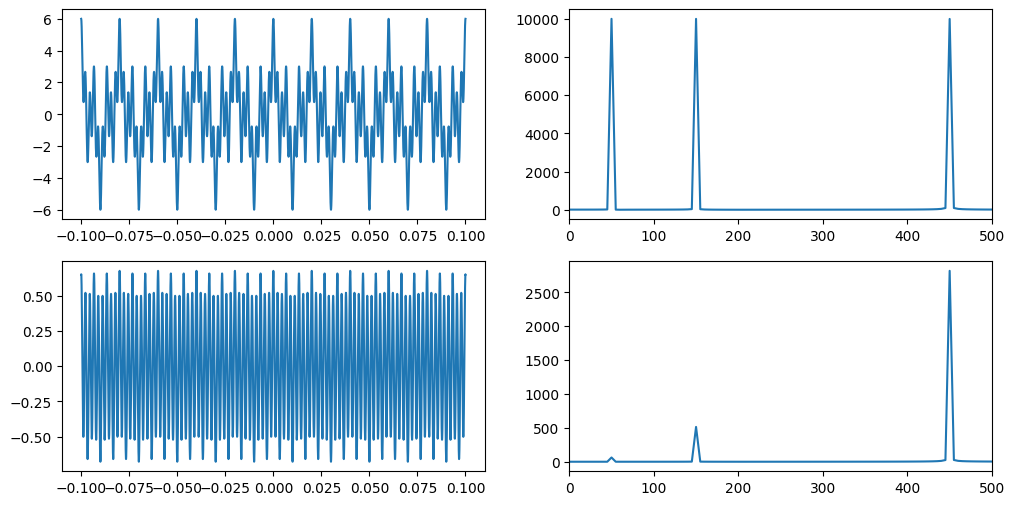

In [70]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t, x_cos)

plt.subplot(2, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

plt.subplot(2, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(2, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

# 5.

In [85]:
cutoff = 150
H_down = butter_down_filter(frequencies, cutoff)
H_up = butter_up_filter(frequencies, cutoff)
H_bp = H_down * H_up
H_st = H_down + H_up

C:\Users\ivan\AppData\Local\Temp\ipykernel_6268\3747560740.py:2: RuntimeWarning: divide by zero encountered in divide
  omega = np.where(freqs != 0, 2 * np.pi * cutoff / freqs, 50000)


In [86]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

In [87]:
signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])

filtred_signal_fft_bp = signal_fft * H_bp
filtred_signal_bp = ifft(filtred_signal_fft_bp)

filtred_signal_fft_st = signal_fft * H_st
filtred_signal_st = ifft(filtred_signal_fft_st)

c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 500.0)

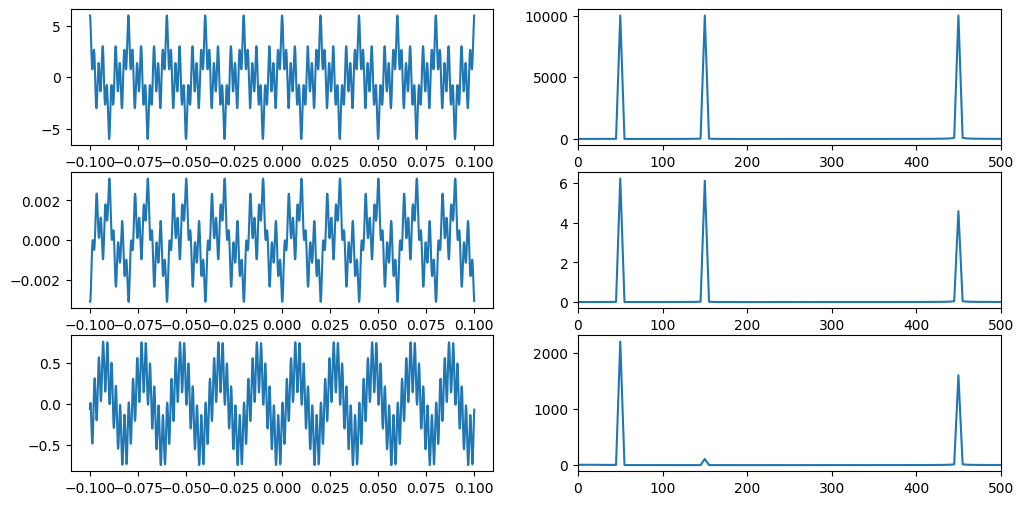

In [88]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal_bp)

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft_bp[:fs//2]))
plt.xlim(0, 500)

plt.subplot(3, 2, 5)
plt.plot(t, filtred_signal_st)

plt.subplot(3, 2, 6)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft_st[:fs//2]))
plt.xlim(0, 500)

# 6. 7.

In [89]:
def butter_get_S(order):
    k = np.arange(1, order + 1)
    poles = -np.exp(1j * ((2 * k - 1) * np.pi / (2 * order)))
    return poles

In [90]:
def butter_filter_order(freqs, cutoff, order):
    poles = butter_get_S(order)
    S = freqs / cutoff
    H = np.ones_like(S, dtype=complex)
    for p in poles:
        H *= 1 / (S + p)
    return H

In [ ]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 500.0)

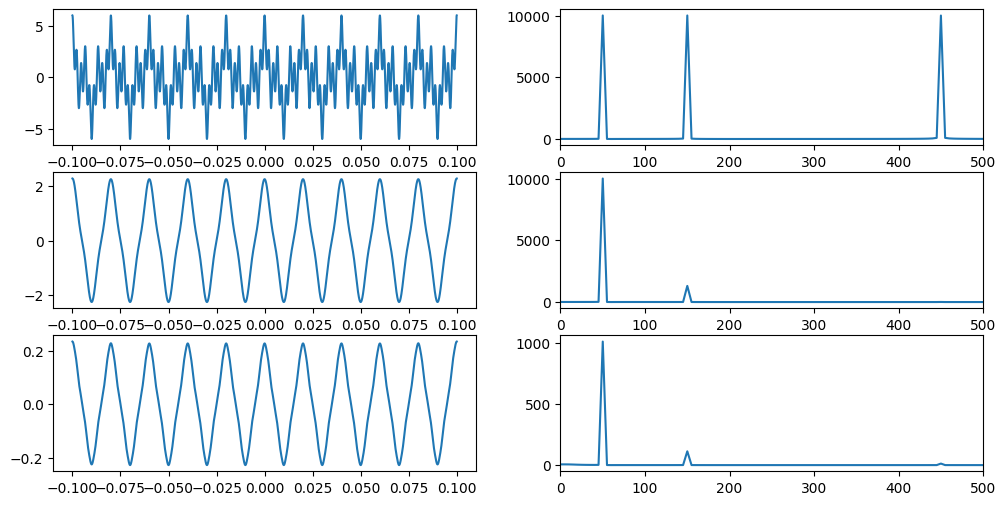

In [97]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H = butter_filter_order(frequencies, cutoff, 5)
filtred_signal_fft = signal_fft * np.abs(H)
filtred_signal = ifft(filtred_signal_fft)

plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H_down = butter_down_filter(frequencies, cutoff)
filtred_signal_fft = signal_fft * np.abs(H_down)
filtred_signal = ifft(filtred_signal_fft)

plt.subplot(3, 2, 5)
plt.plot(t, filtred_signal)

plt.subplot(3, 2, 6)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)


# 8.

In [95]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs)

In [ ]:
signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])

filtred_signal_fft_bp = signal_fft * H_bp
filtred_signal_bp = ifft(filtred_signal_fft_bp)

filtred_signal_fft_st = signal_fft * H_st
filtred_signal_st = ifft(filtred_signal_fft_st)

c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 500.0)

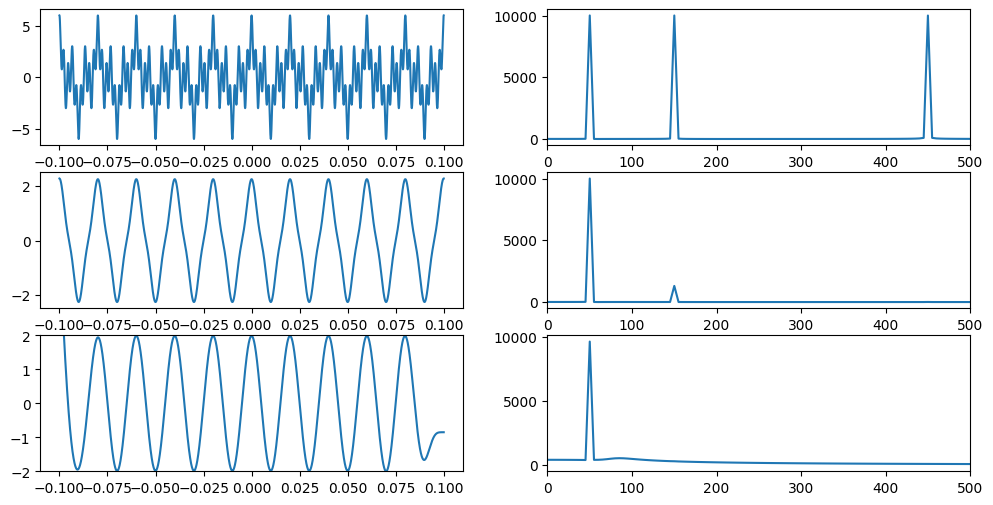

In [108]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H = butter_filter_order(frequencies, cutoff, 5)
filtred_signal_fft = signal_fft * np.abs(H)
filtred_signal = ifft(filtred_signal_fft)

plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)

b, a = scipy.signal.butter(5, 100 / (fs * np.pi), btype='low')
filtred_signal = scipy.signal.filtfilt(b, a, x_cos)
filtred_signal_fft = fft(filtred_signal)

plt.subplot(3, 2, 5)
plt.plot(t, filtred_signal)
plt.ylim(-2, 2)

plt.subplot(3, 2, 6)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)


# 9.

In [137]:
fs = 10000
a = -0.1
b = 0.1
t = np.linspace(a, b, fs)
x_cos = get_cos_singal(a=a, b=b, fs=fs, noise=1)

(0.0, 500.0)

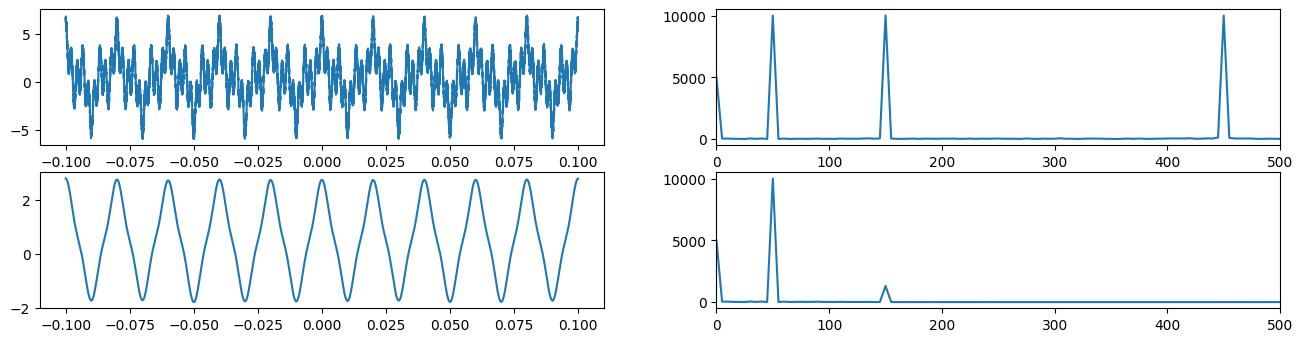

In [139]:
plt.figure(figsize=(16, 6))

plt.subplot(3, 2, 1)
plt.plot(t, x_cos)

plt.subplot(3, 2, 2)
plt.plot(frequencies[:fs//2], np.abs(signal_fft[:fs//2]))
plt.xlim(0, 500)

signal_fft = fft(x_cos)
frequencies = fftfreq(len(x_cos), d=t[1] - t[0])
cutoff = 100
H = butter_filter_order(frequencies, cutoff, 5)
filtred_signal_fft = signal_fft * np.abs(H)
filtred_signal = ifft(filtred_signal_fft)

plt.subplot(3, 2, 3)
plt.plot(t, filtred_signal)

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fs//2], np.abs(filtred_signal_fft[:fs//2]))
plt.xlim(0, 500)